In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
sp_data = pd.read_csv('datasets/sp500_1987.csv')

sp_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-12-31,243.369995,244.029999,241.279999,242.169998,242.169998,139200000
1,1987-01-02,242.169998,246.449997,242.169998,246.449997,246.449997,91880000
2,1987-01-05,246.449997,252.570007,246.449997,252.190002,252.190002,181900000
3,1987-01-06,252.199997,253.990005,252.139999,252.779999,252.779999,189300000
4,1987-01-07,252.779999,255.720001,252.649994,255.330002,255.330002,190900000


In [3]:
sp_data = sp_data.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

In [4]:
sp_data.shape

(254, 2)

In [5]:
sp_data.head()

,Date,Adj Close
0,1986-12-31,242.169998
1,1987-01-02,246.449997
2,1987-01-05,252.190002
3,1987-01-06,252.779999
4,1987-01-07,255.330002


In [6]:
sp_data['Date'] = pd.to_datetime(sp_data['Date'])

In [7]:
sp_data.dtypes

Date         datetime64[ns]
Adj Close           float64
dtype: object

In [8]:
sp_data = sp_data.sort_values(by='Date')

sp_data.head(10)

,Date,Adj Close
0,1986-12-31,242.169998
1,1987-01-02,246.449997
2,1987-01-05,252.190002
3,1987-01-06,252.779999
4,1987-01-07,255.330002
5,1987-01-08,257.279999
6,1987-01-09,258.730011
7,1987-01-12,260.299988
8,1987-01-13,259.950012
9,1987-01-14,262.640015


In [9]:
sp_data.describe()

,Adj Close
count,254.000000
mean,286.821535
std,28.940386
min,223.919998
25%,266.669998
50%,290.414994
75%,308.857490
max,336.769989


Text(0.5, 1.0, 'SP Data')

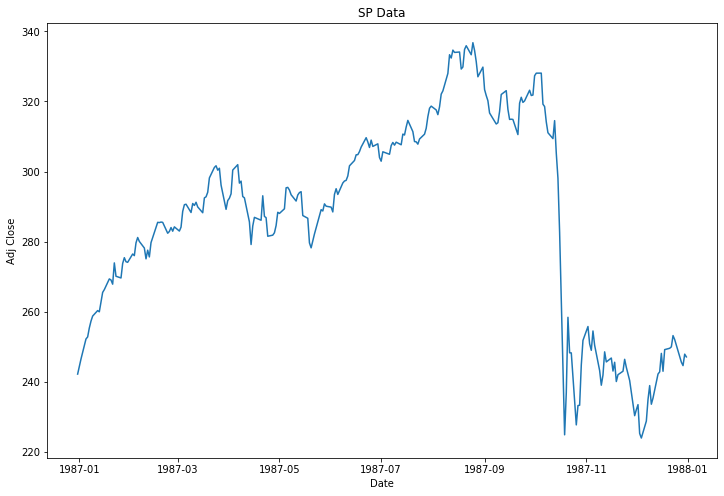

In [10]:
plt.figure(figsize=(12, 8))

sns.lineplot(x='Date', y='Adj Close', data=sp_data)

plt.title('SP Data')

In [11]:
sp_data['Returns'] = sp_data['Adj Close'].pct_change()

sp_data.head(10)

,Date,Adj Close,Returns
0,1986-12-31,242.169998,NaN
1,1987-01-02,246.449997,0.017674
2,1987-01-05,252.190002,0.023291
3,1987-01-06,252.779999,0.002339
4,1987-01-07,255.330002,0.010088
5,1987-01-08,257.279999,0.007637
6,1987-01-09,258.730011,0.005636
7,1987-01-12,260.299988,0.006068
8,1987-01-13,259.950012,-0.001345
9,1987-01-14,262.640015,0.010348


In [12]:
sp_data.dropna(inplace=True)

In [13]:
sp_data.head(10)

,Date,Adj Close,Returns
1,1987-01-02,246.449997,0.017674
2,1987-01-05,252.190002,0.023291
3,1987-01-06,252.779999,0.002339
4,1987-01-07,255.330002,0.010088
5,1987-01-08,257.279999,0.007637
6,1987-01-09,258.730011,0.005636
7,1987-01-12,260.299988,0.006068
8,1987-01-13,259.950012,-0.001345
9,1987-01-14,262.640015,0.010348
10,1987-01-15,265.489990,0.010851


In [14]:
sp_data.count()

Date         253
Adj Close    253
Returns      253
dtype: int64

#### Outliers

Text(0.5, 1.0, 'SP Data')

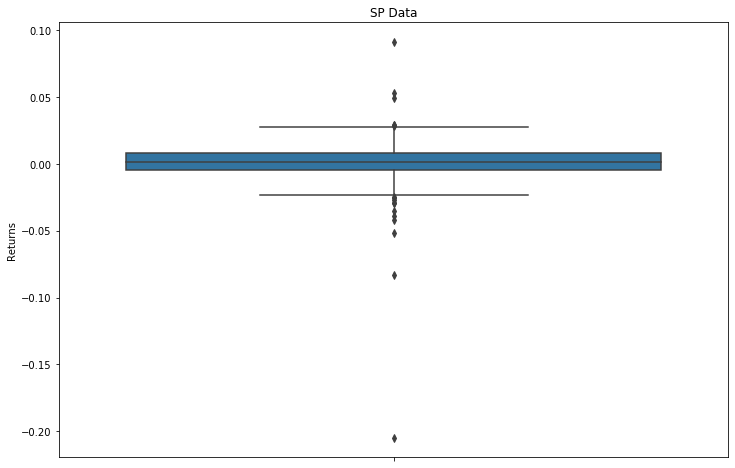

In [15]:
plt.figure(figsize=(12, 8))

sns.boxplot(sp_data['Returns'], orient='v')

plt.title('SP Data')

### Skewness and Kurtosis

https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.robust_skewness.html

https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.robust_kurtosis.html

In [16]:
stats.skew(sp_data['Returns'])

-4.044081087704744

In [17]:
stats.kurtosis(sp_data['Returns'])

42.58345466235547

#### Remove Oct 19, 1987 when there was a huge fall

In [18]:
sp_data_without_oct19 = sp_data[sp_data['Date'] != '1987-10-19']

sp_data_without_oct19.count()

Date         252
Adj Close    252
Returns      252
dtype: int64

Text(0.5, 1.0, 'SP Data')

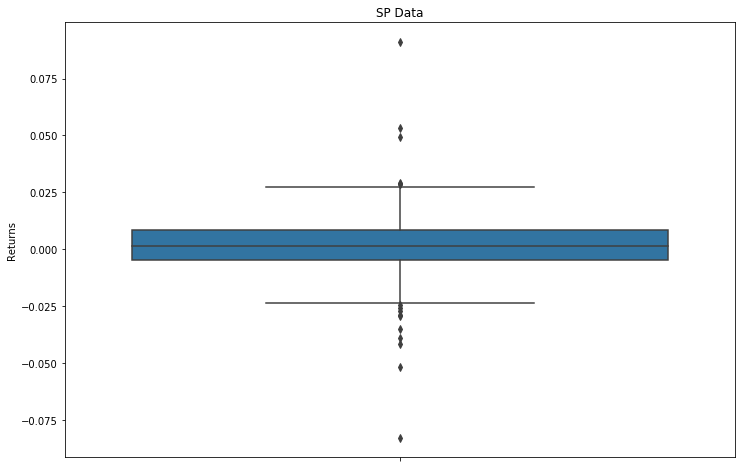

In [19]:
plt.figure(figsize=(12, 8))

sns.boxplot(sp_data_without_oct19['Returns'], orient='v')

plt.title('SP Data')

In [20]:
stats.skew(sp_data_without_oct19['Returns'])

0.020726711142432415

In [21]:
stats.kurtosis(sp_data_without_oct19['Returns'])

7.623113750015866